In [ ]:
# keywords

# load_iris, matplotlib, scatter3D, KNeighborsClassifier

# Урок 1. kNN

В уроке мы разобрали построение модели kNN на базовом наборе данных Iris. Для лучшего понимания, как работает алгоритм, мы использовали только два признака - длину и ширину лепестка. 

Однако другие признаки тоже могли быть важны для получения моделью более детальной информации об объектах и, соответственно, построения более точных прогнозов. 

### 1.
Поочередно добавьте к признакам (petal length, petal width) из урока  оставшиеся признаки, чтобы получилось: 1) (sepal length, petal length, petal width); 2) (sepal width, petal length, petal width).

*Примечание: признаки могут быть расположены в любом порядке.*

In [1]:
from sklearn.datasets import load_iris
import numpy as np

Напомним порядок расположения признаков в массиве данных

In [2]:
iris_dataset = load_iris()
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Для формирования массива новых признаков проще воспользоваться не срезами, как мы делали в уроке - iris_dataset.data[:, 2:4] (здесь мы показываем, что выбираем только со 2го по 4й столбец, причем не включая 2й), а просто удалить один из ненужных нам столбцов с помощью функции библиотеки *numpy.delete*

**Пример**

In [3]:
import numpy as np

In [4]:
a = np.array([[ 0,  1,  2,  3],
               [ 4,  5,  6,  7],
               [ 8,  9, 10, 11],
               [12, 13, 14, 15]])

a_new = np.delete(a, 0, axis=1)
a_new

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15]])

In [5]:
iris_dataset_1 = np.delete(iris_dataset.data, 1, axis=1) ### YOUR CODE HERE ###
iris_dataset_2 = np.delete(iris_dataset.data, 0, axis=1) ### YOUR CODE HERE ###

### 2.
Теперь посмотрите на трехмерном графике, насколько хорошо данные разделяются по каждой из совокупностей трех параметров.

In [6]:
# если работаете в интерактивной оболочке IPython 
%matplotlib inline

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

**Пример** построения трехмерного графика

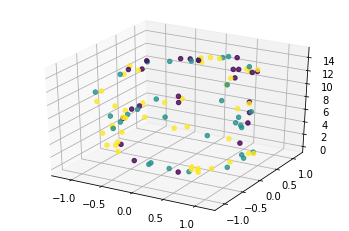

In [7]:
ax = plt.axes(projection='3d')

zdata = 15 * np.random.random(100) # точки оси Z
xdata = np.sin(zdata) + 0.1 * np.random.randn(100) # точки оси X
ydata = np.cos(zdata) + 0.1 * np.random.randn(100) # точки оси Y
colors = np.random.randint(3, size=100)

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=colors)

**Примечание: для установки цвета в функции используйте *c=iris_dataset.target*.**

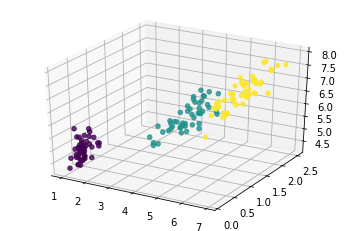

In [10]:
ax = plt.axes(projection='3d')
### YOUR CODE HERE ###

zdata = iris_dataset_1.T[0] # точки оси Z
xdata = iris_dataset_1.T[1] # точки оси X
ydata = iris_dataset_1.T[2] # точки оси Y
colors = iris_dataset.target

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=colors);

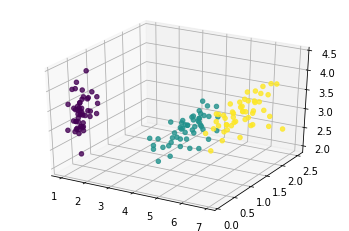

In [11]:
ax = plt.axes(projection='3d')
### YOUR CODE HERE ###

zdata = iris_dataset_2.T[0] # точки оси Z
xdata = iris_dataset_2.T[1] # точки оси X
ydata = iris_dataset_2.T[2] # точки оси Y
colors = iris_dataset.target

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=colors);

### 3.
С помощью функции sklearn.model_selection.train_test_split разделите данные на тренировочный и тестовый датасеты и затем, применив библотечную версию алгоритма sklearn.neighbors.KNeighborsClassifier, постройте модель для наборов данных *iris_dataset_1* и *iris_dataset_2* (по умолчанию используйте n_neighbors=5).

*Примечание: в функции train_test_split используйте параметр random_state=17 для воспроизводимости результатов.*

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [13]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(iris_dataset_1, iris_dataset['target'], random_state=17) ### YOUR CODE HERE ###
model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(x_train_1, y_train_1)
model1_fitted = model1.predict(x_test_1)

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(iris_dataset_2, iris_dataset['target'], random_state=17) ### YOUR CODE HERE ###
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(x_train_1, y_train_1)
model2_fitted = model1.predict(x_test_2)

In [20]:
x_train_1.shape

(112, 3)

In [22]:
x_test_1.shape

(38, 3)

In [21]:
y_train_1.shape

(112,)

### 4.
Проверьте точность работы обеих моделей, используя встроенную функцию sklearn.metrics.accuracy_score. Сравните результат их работы с результатом, полученным на наборе данных с двумя признаками (который разбирался в уроке), и укажите ответ.

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_1 = accuracy_score(y_test_1, model1_fitted) ### YOUR CODE HERE ###
accuracy_2 = accuracy_score(y_test_2, model2_fitted) ### YOUR CODE HERE ###

print(f'Accuracy_1: {accuracy_1}, accuracy_2: {accuracy_2}')

Accuracy_1: 0.9736842105263158, accuracy_2: 0.868421052631579


### 5.
Постройте модель на данных *x_train_1, y_train_1* с гиперпараметром n_neighbors, пробегающим значения от 1 до 20 включительно, и укажите значения n_neighbors, которым соответствует наиболее высокий результат функции accuracy_score().

*Примечание: можно воспользоваться циклом for, чтобы не прописывать вручную все 20 вариаций модели.*

In [15]:
### YOUR CODE HERE ###

for i in range(1,21):
    model1_1 = KNeighborsClassifier(n_neighbors=i)
    model1_1.fit(x_train_1, y_train_1)
    model1_1_fitted = model1_1.predict(x_test_1)
    accuracy_score_1_1 = accuracy_score(y_test_1, model1_1_fitted)
    print('Номер: {},   точность: {}'.format(i, accuracy_score_1_1))

Номер: 1,   точность: 0.9736842105263158
Номер: 2,   точность: 0.9736842105263158
Номер: 3,   точность: 0.9736842105263158
Номер: 4,   точность: 0.9473684210526315
Номер: 5,   точность: 0.9736842105263158
Номер: 6,   точность: 0.9473684210526315
Номер: 7,   точность: 0.9473684210526315
Номер: 8,   точность: 0.9210526315789473
Номер: 9,   точность: 0.9473684210526315
Номер: 10,   точность: 0.9473684210526315
Номер: 11,   точность: 0.9736842105263158
Номер: 12,   точность: 0.9210526315789473
Номер: 13,   точность: 0.9473684210526315
Номер: 14,   точность: 0.9210526315789473
Номер: 15,   точность: 0.9736842105263158
Номер: 16,   точность: 0.9473684210526315
Номер: 17,   точность: 0.9473684210526315
Номер: 18,   точность: 0.9210526315789473
Номер: 19,   точность: 0.9210526315789473
Номер: 20,   точность: 0.9210526315789473


### Максимальная точность достигается при n_neighbors = (1,2,3,5,11,15)